### Time of Flight Isosurface
This is a computer simulation that will attempt to answer the question, first in 2D and eventually in 3d, what does the iso line or iso surface look like for a constant time (or distance) difference, for a Time of flight calcualtion between two ears.   

**assumptions**
- speed of sound in the same everywhere (medium differneces in head are not accounted for
- all sound come from a point source
- we will work in difference in distance rather than time, but the results would be the same
- we normalize location of ears (see below)

below are the handwritten notes that accompany this analysis:

![p1.png](imgs/equConstrainted.PNG)
![p2.png](imgs/equConstrainted.PNG)

In [157]:
#define simulation constants
Lx = -1     #left ear x
Ly =  0     #left ear y
Rx =  1     #right ear x
Ry =  0;     #right ear y

In [158]:
"""
solve the non-linear algebreic equations of constraint using the Newton-Rapson method
inputs:
    Px0 , Py0 = seed location for NR algorithm
    c = difference in distance between two ears
    d2 = the distance of leg2 (see sketch for details)
"""
function NRsolve(Lx,Ly,Rx,Ry,Px0,Py0,c,d2)
    #break counter
    ctr = 1  
    #initialize q
    q = [Px0,Py0]
    while norm([q]) > .000005
        #calculate the jacobian of the expression
        jac = [2*(q[1] - Lx) 2*(q[2] - Ly) ;
               2*(q[1] - Rx) 2*(q[2] - Ry)]
        #calculate the expression @ guess
        phi = [(q[1] - Lx)^2 + (q[2] - Ly)^2 - (c + d2)^2 ; (q[1] - Rx)^2 + (q[2] - Ry)^2 - d2^2]
        
        #calcuate dq
        dq = jac \ -phi
        
        #increment dq
        q += dq
        
         #increment ctr
        ctr += 1
        if ctr > 100 break end
    end
    return q  #q = Px,Py
end

NRsolve

now we will test out our function with (several) test cases

In [8]:
#we know the analytical solution to this one:
println("value should be (0,1): ", NRsolve(Lx,Ly,Rx,Ry,1,1,0,2))
println("value should be (0,-1): ", NRsolve(Lx,Ly,Rx,Ry,-1,-1,0,2))


value should be (0,1): [0.0, 1.0]
value should be (0,-1): [0.0, -1.0]


Looks like our numerical solver is working pretty well. Time to sample the space, and plot isolines for various values of c

In [155]:
c = [0.01, .5, 1.0, 1.5, 2.0]
d2 = 0:1:1000
paths = zeros(length(d2),length(c),2)

for (isoID,isoLine) in enumerate(c)
    for (dID,dist) in enumerate(d2)
        x , y = NRsolve(Lx,Ly,Rx,Ry,5,5,isoLine,dist)
        paths[dID,isoID,1] = x ; paths[dID,isoID,2] = y 
    end
end

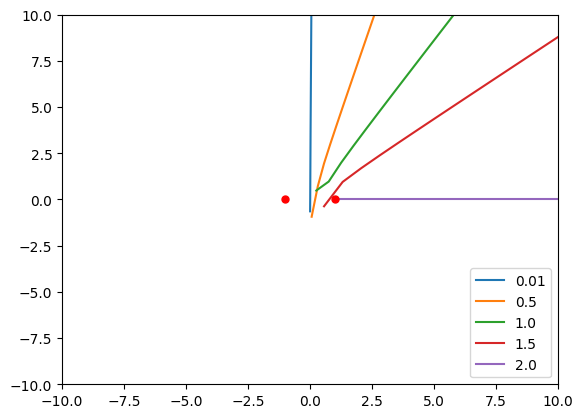

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000002C99A748>

In [156]:
using PyPlot
axis([-10,10,-10,10])
for (isoID,isoline) in enumerate(c)
    plot(paths[:,isoID,1],paths[:,isoID,2])
    
end
legend(c, loc="lower right");

#plot the ears
plot( Lx, Ly, "r.", markersize=10)
plot( Rx, Ry, "r.", markersize=10)


so what do we see? we see some case specific non-linearities arround the origin, with $c = 0$ and $c = 2$ being perfectly straight, as expected. what is supprising is how linear these isolines are, given how non-linear the equations of constraint from which they were calcuated where. This analysis supports the argument that arrival time difference can be used to **encode angle directly in the horozontal plane** one unexplored feature that falls out by inspection is that there is a second, equally plausable solution to these equations, reflected over the x axis. 

future analysis will focus on exploring this reflection futher, and expanding the analysis to include a 3D solution, so the resulting surface can be interpreted